In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

86.7856189917214 59.62205156420697
47.30510439508899 101.13820369170605
-52.26498920431824 87.65370428287025
79.8231624458032 155.31619056587698
64.02469132358368 -111.59755085228882
-14.084805314246395 -89.99070767764039
-40.18421239409196 84.16662439643238
26.776121725154013 -154.40479652587987
-81.48618506894145 33.98283557718116
27.973585790812976 102.65325060873374
11.94526394718514 104.27890065953812
-65.29588853375506 13.865894354990331
22.249709949078706 159.74312440839594
-89.8123588216947 -12.976745172960761
-85.26786969151698 -133.4619872473911
-38.90982428174908 80.81404988863733
0.7291098240988987 -73.8667340292215
15.563303201456833 -45.06818791998131
-20.612517209417916 41.13274400724421
-36.51557747959757 -144.05643534154103
26.278972723933194 157.78056991295028
65.22031045376318 -75.49379036562519
-38.39455519496687 26.353512670828962
-72.57463749563045 103.20003853553288
-72.2083143675533 72.51403302050929
83.99514876135825 -83.30663772533318
-70.04812994912218 -143.1

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | moron
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | chicama
Processing Record 7 of Set 1 | kahului
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | xichang
Processing Record 10 of Set 1 | kampong chhnang
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | cartagena del chaira
Processing Record 16 of Set 1 | sinnamary
Processing Record 17 of Set 1 | morondava
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | albany
Processing Record 22 of Se

Processing Record 41 of Set 4 | kudat
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | guasdualito
Processing Record 44 of Set 4 | san cristobal
Processing Record 45 of Set 4 | muscat
Processing Record 46 of Set 4 | pahrump
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | bahia blanca
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | berdigestyakh
Processing Record 1 of Set 5 | berlevag
Processing Record 2 of Set 5 | ponnampet
Processing Record 3 of Set 5 | hanzhong
Processing Record 4 of Set 5 | ubinskoye
Processing Record 5 of Set 5 | kuche
City not found. Skipping...
Processing Record 6 of Set 5 | kedarnath
City not found. Skipping...
Processing Record 7 of Set 5 | amderma
City not found. Skipping...
Processing Record 8 of Set 5 | vostok
Processing Record 9 of Set 5 | nantucket
Processing Record 10 of Set 5 | skjervoy
Processing Record 11 of Set 5 | tacoronte
Processing Record 12 of Set 5 | sitka
Processing Record 13 

Processing Record 31 of Set 8 | ilhabela
Processing Record 32 of Set 8 | vardo
Processing Record 33 of Set 8 | torata
Processing Record 34 of Set 8 | ivanovka
Processing Record 35 of Set 8 | tabuk
Processing Record 36 of Set 8 | udachnyy
Processing Record 37 of Set 8 | ullapool
Processing Record 38 of Set 8 | fukue
Processing Record 39 of Set 8 | aklavik
Processing Record 40 of Set 8 | hohhot
Processing Record 41 of Set 8 | souillac
Processing Record 42 of Set 8 | anchorage
Processing Record 43 of Set 8 | la solana
Processing Record 44 of Set 8 | taoudenni
Processing Record 45 of Set 8 | elat
Processing Record 46 of Set 8 | luneville
Processing Record 47 of Set 8 | bandar-e lengeh
Processing Record 48 of Set 8 | kiunga
Processing Record 49 of Set 8 | olga
Processing Record 50 of Set 8 | goundam
Processing Record 1 of Set 9 | henties bay
Processing Record 2 of Set 9 | vilcun
Processing Record 3 of Set 9 | haibowan
City not found. Skipping...
Processing Record 4 of Set 9 | nyurba
Process

Processing Record 21 of Set 12 | takayama
Processing Record 22 of Set 12 | oliveira dos brejinhos
Processing Record 23 of Set 12 | fort myers beach
Processing Record 24 of Set 12 | venice
Processing Record 25 of Set 12 | grand gaube
Processing Record 26 of Set 12 | muroto
Processing Record 27 of Set 12 | giraltovce
Processing Record 28 of Set 12 | libreville
Processing Record 29 of Set 12 | quime
Processing Record 30 of Set 12 | bonfim
Processing Record 31 of Set 12 | madang
Processing Record 32 of Set 12 | pizarro
Processing Record 33 of Set 12 | surt
Processing Record 34 of Set 12 | ifanadiana
Processing Record 35 of Set 12 | djambala
Processing Record 36 of Set 12 | shenjiamen
Processing Record 37 of Set 12 | jabiru
City not found. Skipping...
Processing Record 38 of Set 12 | dawson creek
Processing Record 39 of Set 12 | grindavik
Processing Record 40 of Set 12 | malakal
Processing Record 41 of Set 12 | shimoda
Processing Record 42 of Set 12 | ilinskaya
Processing Record 43 of Set 1

In [22]:
len(city_data)

601

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moron,-34.6534,-58.6198,78.03,49,0,6.08,AR,2022-02-07 20:43:50
1,Busselton,-33.6500,115.3333,59.04,87,11,2.73,AU,2022-02-07 20:43:50
2,Chokurdakh,70.6333,147.9167,-45.42,100,97,5.08,RU,2022-02-07 20:43:51
3,Yellowknife,62.4560,-114.3525,-0.58,88,75,12.66,CA,2022-02-07 20:39:21
4,Chicama,-7.8447,-79.1469,66.74,56,70,11.25,PE,2022-02-07 20:43:51
5,Kahului,20.8947,-156.4700,80.96,66,0,21.85,US,2022-02-07 20:43:51
6,Port Elizabeth,-33.9180,25.5701,64.69,94,0,6.91,ZA,2022-02-07 20:43:52
7,Xichang,27.8964,102.2634,37.63,77,6,2.95,CN,2022-02-07 20:43:52
8,Kampong Chhnang,12.1667,104.5500,76.60,77,72,6.02,KH,2022-02-07 20:43:52
9,Hermanus,-34.4187,19.2345,65.80,92,23,5.84,ZA,2022-02-07 20:43:53


In [26]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Moron,0,AR,2022-02-07 20:43:50,49,-34.6534,-58.6198,78.03,6.08
1,Busselton,11,AU,2022-02-07 20:43:50,87,-33.6500,115.3333,59.04,2.73
2,Chokurdakh,97,RU,2022-02-07 20:43:51,100,70.6333,147.9167,-45.42,5.08
3,Yellowknife,75,CA,2022-02-07 20:39:21,88,62.4560,-114.3525,-0.58,12.66
4,Chicama,70,PE,2022-02-07 20:43:51,56,-7.8447,-79.1469,66.74,11.25
5,Kahului,0,US,2022-02-07 20:43:51,66,20.8947,-156.4700,80.96,21.85
6,Port Elizabeth,0,ZA,2022-02-07 20:43:52,94,-33.9180,25.5701,64.69,6.91
7,Xichang,6,CN,2022-02-07 20:43:52,77,27.8964,102.2634,37.63,2.95
8,Kampong Chhnang,72,KH,2022-02-07 20:43:52,77,12.1667,104.5500,76.60,6.02
9,Hermanus,23,ZA,2022-02-07 20:43:53,92,-34.4187,19.2345,65.80,5.84


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [30]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644273269.829274

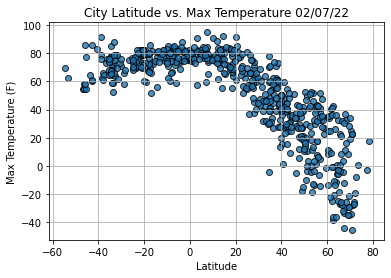

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

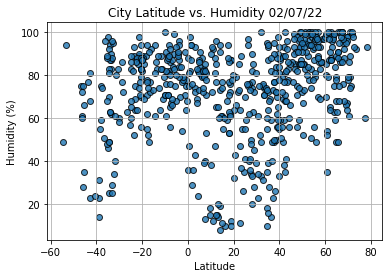

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

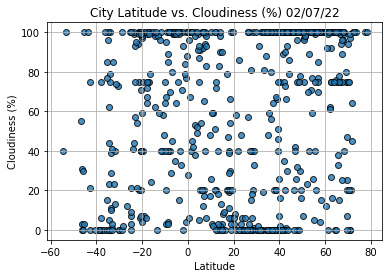

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

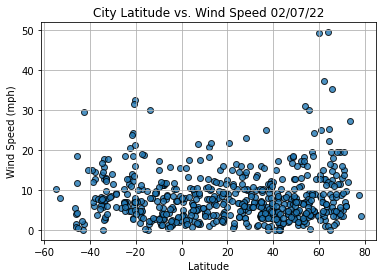

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()